# Basic implementation of weights of evidence for predictive mapping of mineral deposits

In [40]:
import sys
sys.path.insert(0, "..")

In [41]:
import rasterio
import pandas as pd
from rasterio import Affine
from matplotlib import pyplot as plt
from rasterio.plot import show
import numpy as np

In [42]:
test_ev = rasterio.open("../tests/data/remote/wofe/wofe_ev_nan.tif")
test_dep = rasterio.open("../tests/data/remote/wofe/wofe_dep_nan_.tif")

## Weights Calculations - Use the weights_calculations function

In [43]:
from eis_toolkit.prediction.weights_of_evidence.calculate_weights import calculate_weights    

### Calculate weights for weights type - Unique

In [44]:
test_wgt_un_, test_gen_un_, test_rst_meta = calculate_weights(test_ev, test_dep, -1000000000.0, 0, 2)

### Calculate weights for weights type - Cumulative Ascending

In [45]:
test_wgt_asc_, test_gen_asc_, test_rst_meta = calculate_weights(test_ev, test_dep, -1000000000.0, 1, 2)

### Calculate weights for weights type - Cumulative Descending

In [46]:
test_wgt_dsc_, test_gen_dsc_, test_rst_meta = calculate_weights(test_ev, test_dep, -1000000000.0, 2, 2)

### Optional: Save results to csv 

In [9]:
tab_names = ['test_wgt_un_', 'test_wgt_asc_', 'test_wgt_dsc_']
weights_tables = [test_wgt_un_, test_wgt_asc_, test_wgt_dsc_]

In [ ]:
for tab_name, tab in zip(tab_names, weights_tables):
    tab.to_csv(f'../tests/data/{tab_name}.csv')

### Plot arrays: Example - Generalized weights for weights type 'Unique'

<AxesSubplot: title={'center': 'Generalized weights'}>

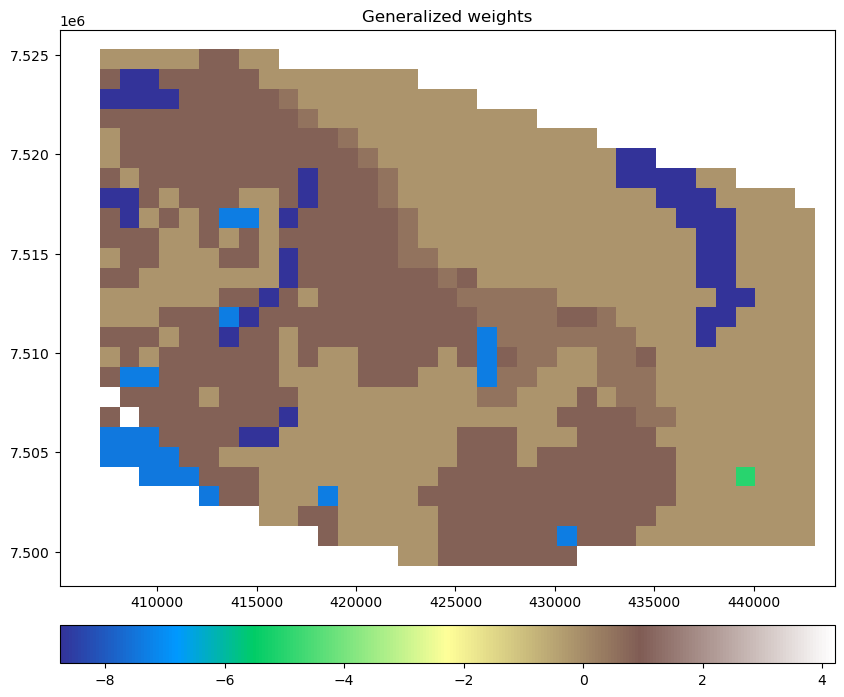

In [47]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_un_[1], cmap='terrain')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_un_[1], ax = ax, transform = test_ev.transform, cmap='terrain')

### Plot arrays: Example - Generalized weights for weights type 'Cumulative Ascending'

<AxesSubplot: title={'center': 'Generalized weights'}>

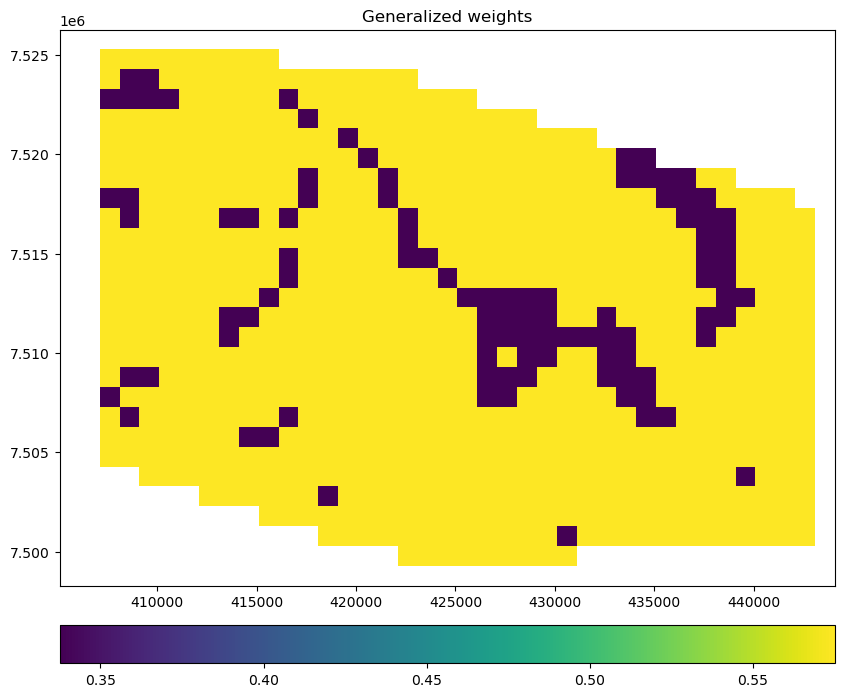

In [48]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_asc_[1], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_asc_[1], ax = ax, transform = test_ev.transform, cmap='viridis')

### Plot arrays: Example - Generalized weights for weights type 'Cumulative Descending'

<AxesSubplot: title={'center': 'Generalized weights'}>

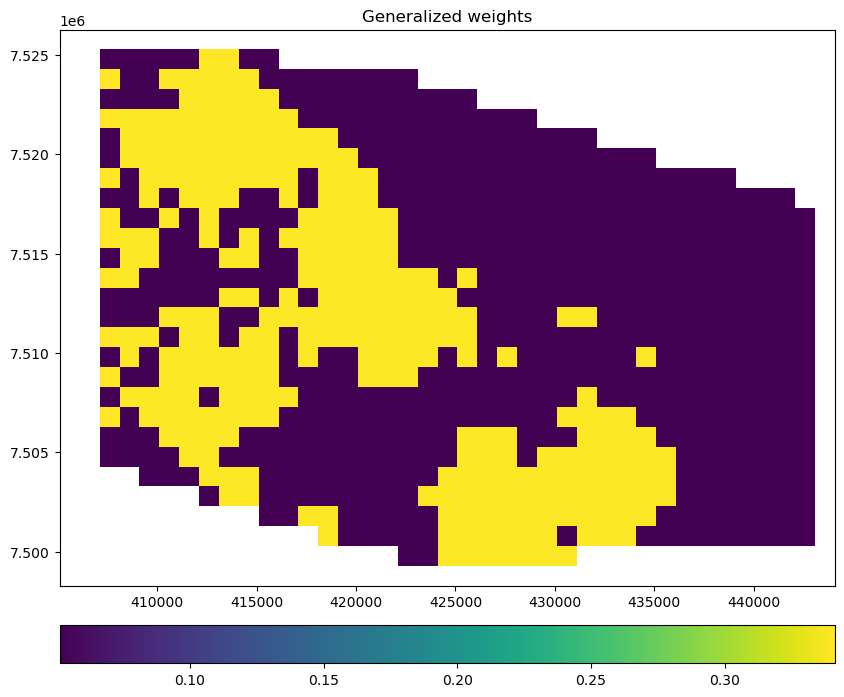

In [49]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_dsc_[1], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_dsc_[1], ax = ax, transform = test_ev.transform, cmap='viridis')

#### Optional: Use the following function to save the arrays as a Geotif file. Example given below. By default the raster will be stored in the notebooks directory. 

In [12]:
def arry_tif (out_meta, rstr_name, rst_arr, indx):
    rst_cls = rasterio.open(rstr_name, 'w', **out_meta)
    rst_cls.write(rst_arr[indx], 1)
    rst_cls.close()
    test_tf = rasterio.open(rstr_name)
    show(test_tf, 1)

In [13]:
out_meta = test_ev.meta.copy()

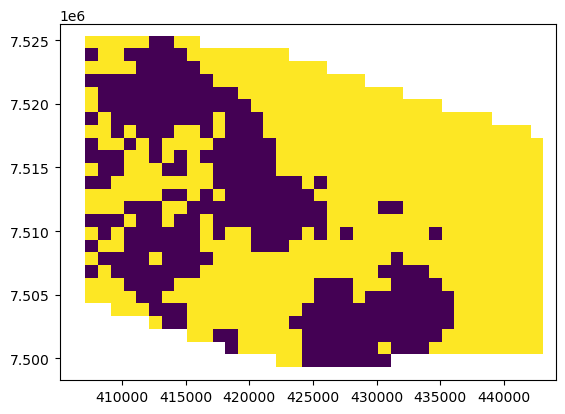

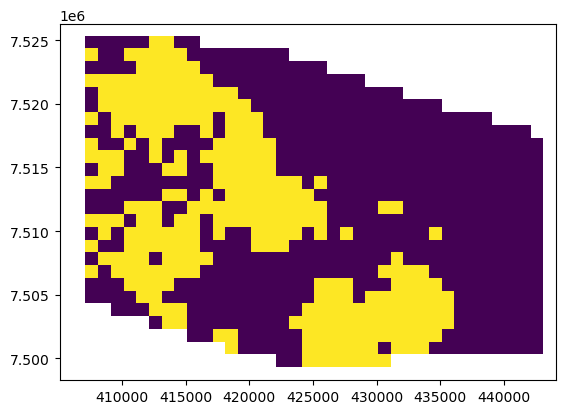

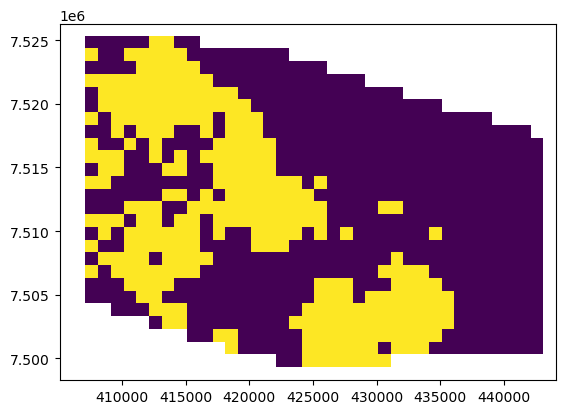

In [14]:
arry_tif(out_meta, 'rst_clss_dsc_.tif', test_gen_dsc_, 0) #saves the generalized classes
arry_tif(out_meta, 'rst_gen_wgts_dsc_.tif', test_gen_dsc_, 1) #saves the generalized weights of the generalized classes
arry_tif(out_meta, 'rst_gen_std_dsc_.tif', test_gen_dsc_, 2) #saves the standard deviations of the generalized weights 

# Integration of generalized weights rasters to calculate the posterior probabilities - use the 'calculate_responses' function

In [15]:
from eis_toolkit.prediction.weights_of_evidence.calculate_responses import calculate_responses

In [16]:
test_wgts_arr = [test_gen_un_, test_gen_asc_, test_gen_dsc_]

In [17]:
t_pprb_array, t_pprb_std, t_pprb_conf, array_meta = calculate_responses(test_dep, test_wgts_arr)

### Plotting the Posterior Probability Raster

<AxesSubplot: title={'center': 'Probability'}>

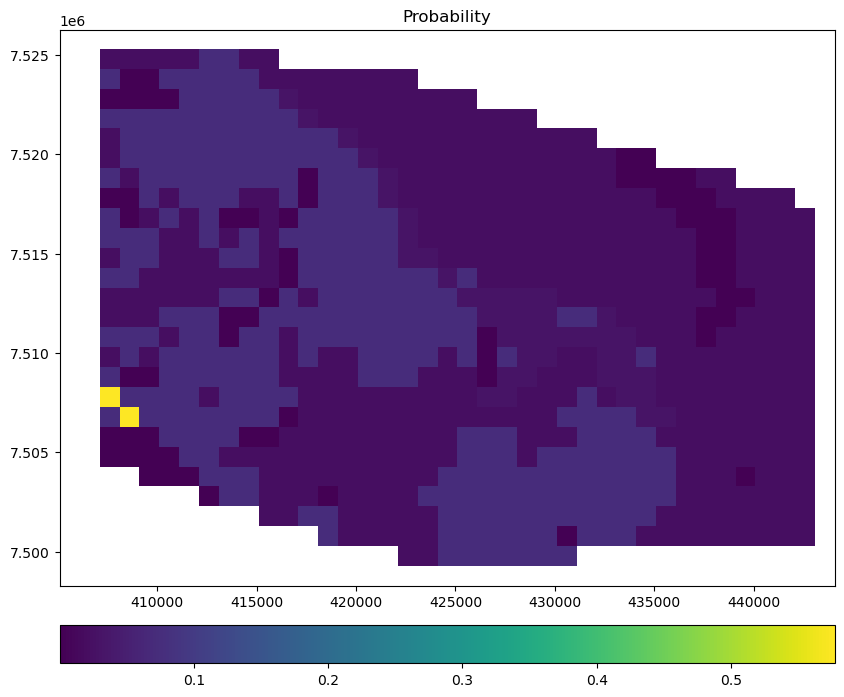

In [18]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Probability")
clrbar = ax.imshow(t_pprb_array, cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(t_pprb_array, ax = ax, transform = test_ev.transform, cmap='viridis')

### Plotting the Standard Deviations of the calculated posterior Probabilities

<AxesSubplot: title={'center': 'Standard Deviation of Posterior Probabilities'}>

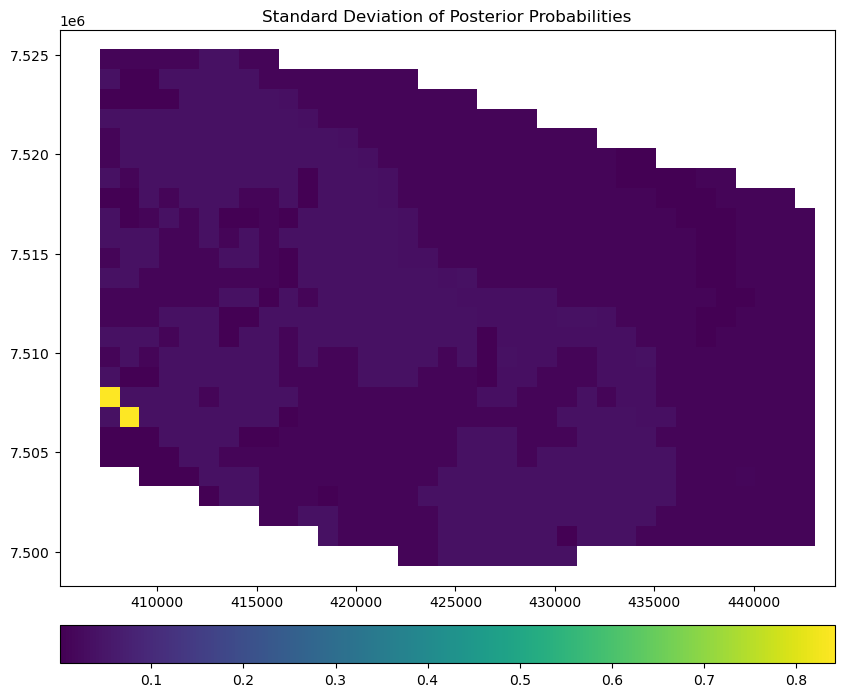

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Standard Deviation of Posterior Probabilities")
clrbar = ax.imshow(t_pprb_std, cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(t_pprb_std, ax = ax, transform = test_ev.transform, cmap='viridis')

### Plotting the Confidence in the posterior probability values

<AxesSubplot: title={'center': 'Confidence'}>

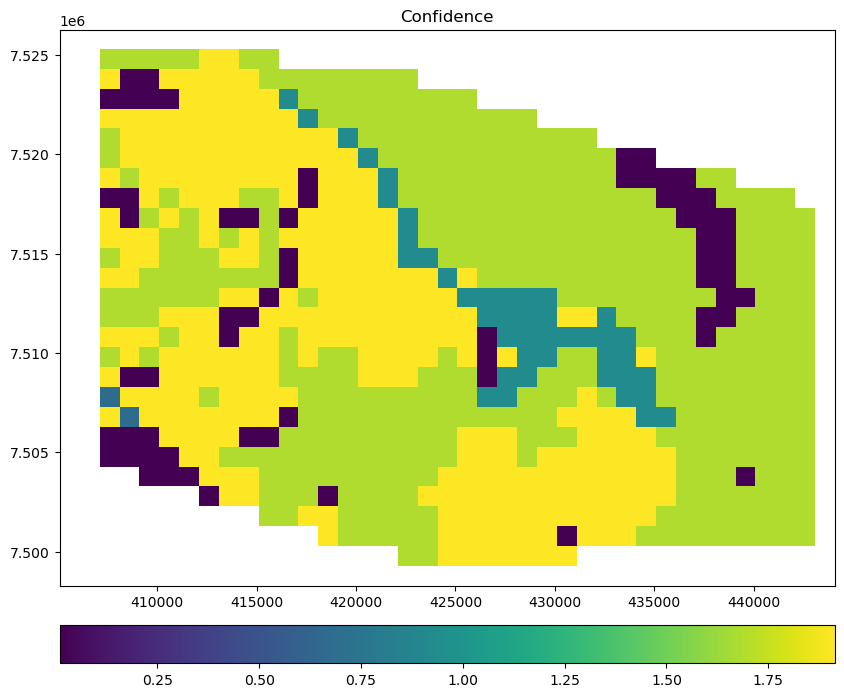

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Confidence")
clrbar = ax.imshow(t_pprb_conf)
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(t_pprb_conf, ax = ax, transform = test_ev.transform)

### Optional: Save the probability arrays to raster files

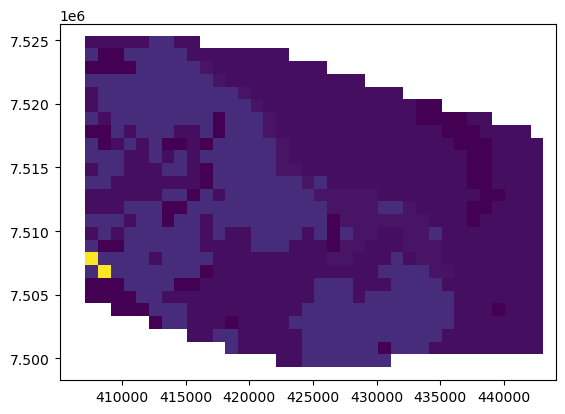

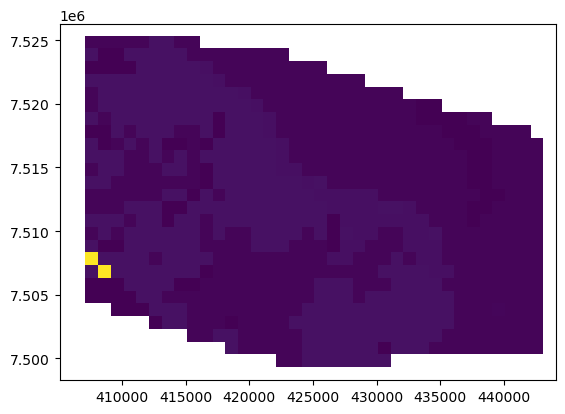

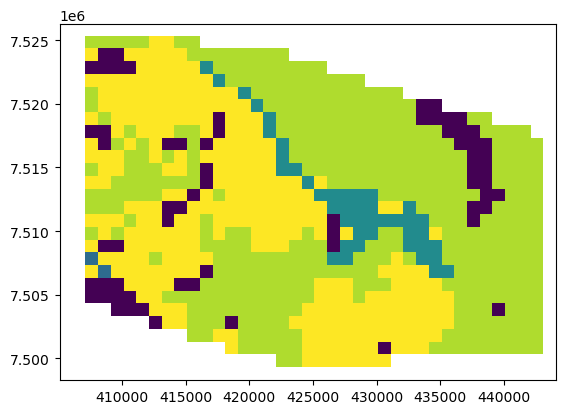

In [21]:
list_pprbs = [t_pprb_array, t_pprb_std, t_pprb_conf]
arry_tif(out_meta, 'pprb.tif', list_pprbs, 0) #saves the posterior probability raster
arry_tif(out_meta, 'pprb_std.tif', list_pprbs, 1) #saves the standard deviation of the prosterior probability raster
arry_tif(out_meta, 'pprb_conf.tif', list_pprbs, 2) #saves the confidence score in the posterior probability calculcations as a raster

